In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pulser.devices import Chadoq2
from pulser import Pulse, Sequence, Register

from src.mapping import create_coordinates
from src.qubo_tools import build_qubo_matrix

from src.mapping import create_coordinates
from src.qubo_tools import build_qubo_matrix, brute_force
from src.quantum_solver_vqaa import VQAA, plot_solution_vqaa

In [2]:
import warnings
warnings.filterwarnings("ignore")

# VQAA tests

The VQAA solver needs the following parameters: 
- **Register**: The atomic register representing the problem in the quantum device
- **qubo_matrix**: QUBO matrix representing the problem
- **omega_range**: The range of frequencies to used for the optimizer parameters. Default (1,5)
- **detuning_range**: The range of detuning to used for the optimizer parameters. Default (1,5)
- **time_range**: The range of time evolution for the adiabatic process to used for the optimizer parameters. Default (8,25)
- **minimizer_method**: Minimizer to use from scipy. Default Nelder-Mead
- **repetitions**: The number of times to repeat the optimization. Default(10) 

The output of the VQAA solver is the following:

- **opt_param**: Optimal parameters for the QAA

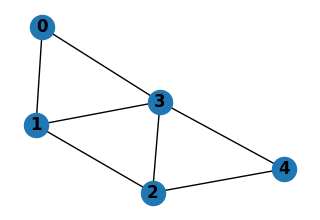

In [10]:
Graph_Example_encoding  = nx.Graph()
Graph_Example_encoding .add_edges_from([[0,1],[1,2], [1,3], [0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_encoding ,with_labels=True,font_weight='bold')

In [4]:
Q_example_encoding = build_qubo_matrix(Graph_Example_encoding)
coords_example = create_coordinates(Q_example_encoding)

In [5]:
qubits_example = dict(enumerate(coords_example))
reg_example = Register(qubits_example)
#reg_example.draw(blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),draw_graph=True,draw_half_radius=True)

In [6]:
opt_parameters = VQAA(reg_example,
                      Q_example_encoding)

In [7]:
print("Optimal time evolution (ns):", opt_parameters[0])
print("Optimal omega:", opt_parameters[1])
print("Optimal detuning:", opt_parameters[2])

Optimal time evolution (ns): 23045.765215084873
Optimal omega: 4.273203206201011
Optimal detuning: 4.5195488428076045


Best solution: 10101 with 5.0 cuts


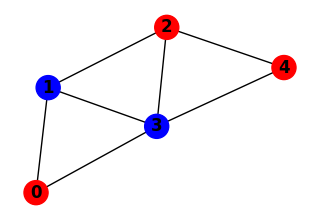

In [8]:
plot_solution_vqaa(Graph_Example_encoding , 
              Q_example_encoding,
              opt_parameters,
              reg_example)

In [9]:
brute_force(Q_example_encoding)[:7]

[('00110', -5.0),
 ('01001', -5.0),
 ('01010', -5.0),
 ('01011', -5.0),
 ('10100', -5.0),
 ('10101', -5.0),
 ('10110', -5.0)]

# Example 1: Triangular graph

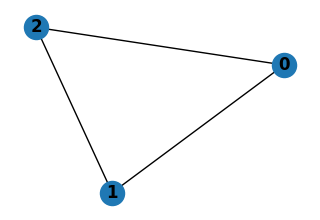

In [11]:
Graph_triangular = nx.Graph()
Graph_triangular.add_edges_from([[0,1],[1,2],[0,2]])
plt.figure(figsize=(3,2)) 
nx.draw(Graph_triangular,with_labels=True,font_weight='bold')

Q_triangular = build_qubo_matrix(Graph_triangular)
coords_triangular = create_coordinates(Q_triangular)

qubits_tiangular = dict(enumerate(coords_triangular))
reg_triangular = Register(qubits_tiangular)
#reg_triangular.draw(blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True,draw_half_radius=True,)

In [12]:
opt_parameters_triangular = VQAA(reg_triangular,
                                 Q_triangular)

In [13]:
print("Optimal time evolution (ns) triangular graph:", opt_parameters_triangular[0])
print("Optimal omega  triangular graph:", opt_parameters_triangular[1])
print("Optimal detuning  triangular graph:", opt_parameters_triangular[2])

Optimal time evolution (ns) triangular graph: 11872.325949635051
Optimal omega  triangular graph: 1.1584010807930496
Optimal detuning  triangular graph: 3.8023533035733905


Best solution: 010 with 2.0 cuts


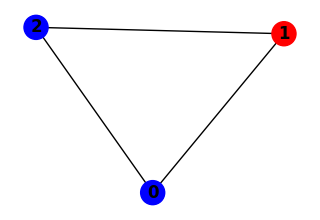

In [14]:
plot_solution_vqaa(Graph_triangular, 
                   Q_triangular,
                   opt_parameters_triangular,
                   reg_triangular)

In [15]:
brute_force(Q_triangular)[:4]

[('001', -2.0), ('010', -2.0), ('011', -2.0), ('100', -2.0)]

## Example 2: Square graph 

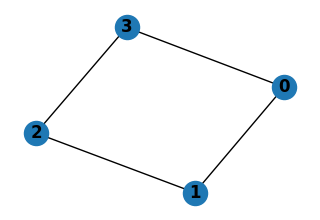

In [17]:
Graph_square= nx.Graph()
Graph_square.add_edges_from([[0,1],[0,3],[1,2],[2,3]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_square,with_labels=True,font_weight='bold')

Q_square = build_qubo_matrix(Graph_square)
coords_square = create_coordinates(Q_square, 
                                   optimizer = 'Nelder-Mead' )

qubits_square = dict(enumerate(coords_square))
reg_square = Register(qubits_square)
#reg_square.draw(blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),draw_graph=True,draw_half_radius=True,)

In [18]:
opt_parameters_square = VQAA(reg_square,
                             Q_square)

In [19]:
print("Optimal time evolution (ns) square graph:", opt_parameters_square [0])
print("Optimal omega  square graph:", opt_parameters_square [1])
print("Optimal detuning  square graph:", opt_parameters_square [2])

Optimal time evolution (ns) square graph: 20583.33333333333
Optimal omega  square graph: 1.2622740792454805
Optimal detuning  square graph: 2.3409765292153226


Best solution: 1010 with 4.0 cuts


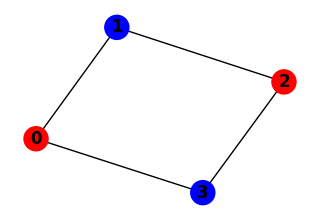

In [20]:
plot_solution_vqaa(Graph_square, 
                   Q_square,
                   opt_parameters_square,
                   reg_square)

In [21]:
brute_force(Q_square)[:4]

[('0101', -4.0), ('1010', -4.0), ('0001', -2.0), ('0010', -2.0)]

## Example 3

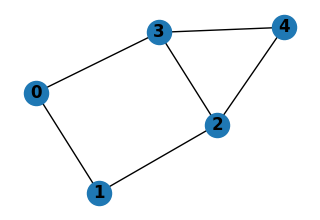

In [22]:
Graph_Example_3 = nx.Graph()
Graph_Example_3.add_edges_from([[0,1],[1,2],[0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_3,with_labels=True,font_weight='bold')

Q_example_3 = build_qubo_matrix(Graph_Example_3 )
coords_example_3 = create_coordinates(Q_example_3)

qubits_example_3 = dict(enumerate(coords_example_3))
reg_example_3 = Register(qubits_example_3)
#reg_example_3.draw(blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True,draw_half_radius=True,)

In [24]:
opt_parameters_example_3 = VQAA(reg_example_3,
                                Q_example_3)

In [25]:
print("Optimal time evolution (ns) example 3:", opt_parameters_example_3[0])
print("Optimal omega  example 3:", opt_parameters_example_3[1])
print("Optimal detuning  example 3:",opt_parameters_example_3[2])

Optimal time evolution (ns) example 3: 10224.139405640602
Optimal omega  example 3: 4.193120325946931
Optimal detuning  example 3: 2.4578785116210637


Best solution: 10100 with 5.0 cuts


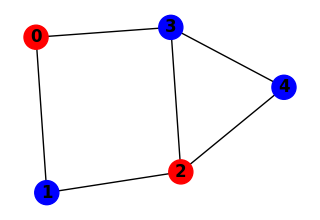

In [27]:
plot_solution_vqaa(Graph_Example_3, 
                   Q_example_3,
                   opt_parameters_example_3,
                   reg_example_3)

In [28]:
brute_force(Q_example_3)[:4]

[('01010', -5.0), ('01011', -5.0), ('10100', -5.0), ('10101', -5.0)]

## Example 4: Bull graph

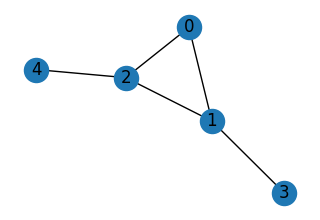

In [29]:
bull_graph = nx.bull_graph()

plt.figure(figsize=(3,2)) 
nx.draw(bull_graph,with_labels=True)

Q_bull = build_qubo_matrix(bull_graph)
coords_bull = create_coordinates(Q_bull,
                                optimizer ='Nelder-Mead')

qubits_bull = dict(enumerate(coords_bull))
reg_bull = Register(qubits_bull)
#reg_bull.draw(blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),draw_graph=True,draw_half_radius=True,)

In [30]:
opt_parameters_bull = VQAA(reg_bull,
                           Q_bull)

In [31]:
print("Optimal time evolution (ns) bull graph:",opt_parameters_bull [0])
print("Optimal omega bull graph:", opt_parameters_bull[1])
print("Optimal detuning  bull graph:",opt_parameters_bull[2])

Optimal time evolution (ns) bull graph: 22723.17956343891
Optimal omega bull graph: 2.287800177924905
Optimal detuning  bull graph: 2.6157902593903892


Best solution: 10011 with 4.0 cuts


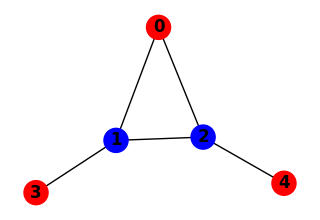

In [32]:
plot_solution_vqaa(bull_graph , 
                   Q_bull,
                   opt_parameters_bull,
                   reg_bull)

In [33]:
brute_force(Q_bull)[:4]

[('00110', -4.0), ('01001', -4.0), ('01100', -4.0), ('10011', -4.0)]

## Example 5

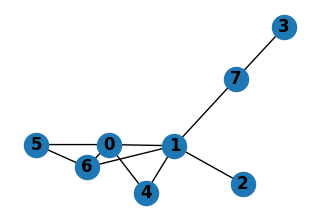

In [3]:
Graph_Example_5 = nx.Graph()
Graph_Example_5.add_edges_from([[0, 1],[6, 1],[2, 1],[6, 5],[4, 1],[0, 4], [1, 7], [0, 6], [5, 0],[7, 3]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_5,with_labels=True,font_weight='bold')

Q_Example_5 = build_qubo_matrix(Graph_Example_5)
qubits_5 = {"0": (0, 0),"1": (-4, -7),"2": (-12, -12), "3": (12, -14), "4": (-8, 2),
            "5": (4, 9),"6": (10, 0),"7": (3, -14),}
reg_by_hand_5 = Register(qubits_5)
#reg_by_hand_5.draw(blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True)

In [4]:
opt_parameters_example_5 = VQAA(reg_by_hand_5,
                                Q_Example_5,
                                minimizer_method ='COBYLA')

In [5]:
print("Optimal time evolution (ns) example 5:",opt_parameters_example_5[0])
print("Optimal omega example 5:", opt_parameters_example_5[1])
print("Optimal detuning  example 5:",opt_parameters_example_5[2])

Optimal time evolution (ns) example 5: 16997.764794877014
Optimal omega example 5: 5.203069429664728
Optimal detuning  example 5: 7.5668696700999725


Best solution: 00111110 with 7.0 cuts


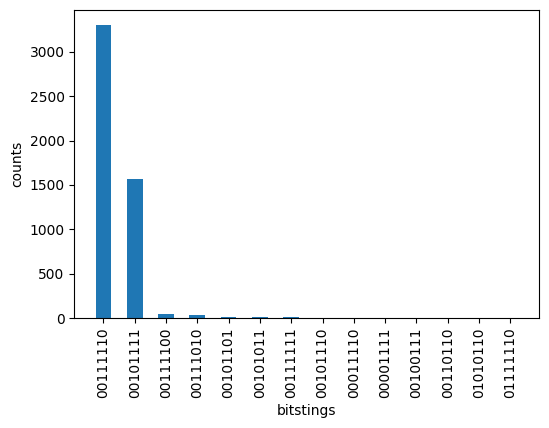

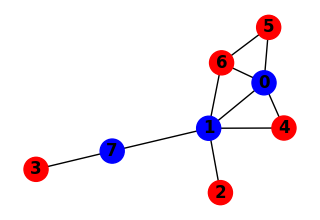

In [8]:
plot_solution_vqaa(Graph_Example_5, 
                   Q_Example_5,
                   opt_parameters_example_5,
                   reg_by_hand_5,
                   plot_histogram = True)

In [7]:
brute_force(Q_Example_5)[:4]

[('00101011', -8.0),
 ('00101111', -8.0),
 ('01010100', -8.0),
 ('01011100', -8.0)]